In [1]:
import numpy as np
import pandas as pd
import matplotlib as mat  
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_csv("DS1_C8_V3_ND_Sprint3_BankChurn_Data.csv")
Data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


# Understanding the data

## *Pre-processing ⚒️

In [3]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.638225e+01,8.341393e+00,18.0,4.100000e+01,4.600000e+01,5.200000e+01,8.900000e+01
Dependent_count,10127.0,2.787400e+00,6.479135e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,1.430000e+02
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10067.0,8.703181e+03,9.190059e+03,1438.3,2.555500e+03,4.557000e+03,1.112750e+04,3.466400e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [4]:
Data.describe(include=object)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Region
count,10127,10127,10127,10127,10127,9995,10127
unique,2,2,7,4,6,4,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue,England
freq,8500,5356,3128,4687,3561,9315,5393


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Region                    10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

In [6]:
Data.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Region                        0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

In [7]:
#Seprating out the categorical and continuous variables-----> unique and nunique
numeric_columns = []
categorical_columns = []

for column in Data.columns:
    if pd.api.types.is_numeric_dtype(Data[column]):
        numeric_columns.append(column)
    else:
        categorical_columns.append(column)
print(tabulate({"Categorical":categorical_columns,
                "numerical": numeric_columns}, headers = ["categorical", "numerical"]))

categorical      numerical
---------------  ------------------------
Attrition_Flag   CLIENTNUM
Gender           Customer_Age
Education_Level  Dependent_count
Marital_Status   Months_on_book
Income_Category  Total_Relationship_Count
Card_Category    Months_Inactive_12_mon
Region           Contacts_Count_12_mon
                 Credit_Limit
                 Total_Revolving_Bal
                 Avg_Open_To_Buy
                 Total_Trans_Amt
                 Total_Trans_Ct
                 Avg_Utilization_Ratio


In [8]:
Data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Region', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [9]:
Data["Card_Category"].fillna(Data["Card_Category"].mode()[0],inplace=True)

In [10]:
Data["Credit_Limit"].fillna(Data["Credit_Limit"].median(),inplace=True)

In [11]:
Data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Region                      0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

In [12]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.638225e+01,8.341393e+00,18.0,4.100000e+01,4.600000e+01,5.200000e+01,8.900000e+01
Dependent_count,10127.0,2.787400e+00,6.479135e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,1.430000e+02
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.678615e+03,9.168315e+03,1438.3,2.563000e+03,4.557000e+03,1.108150e+04,3.466400e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


# Outliers Analysis

### **Creating a function for box plot 

In [13]:
def box_plot(*s):
    for col in s:
        print("b=Box plot for the column : ",col)
        sns.boxplot(col,data=Data)
        plt.show()

Box plot for the column: Customer_Age


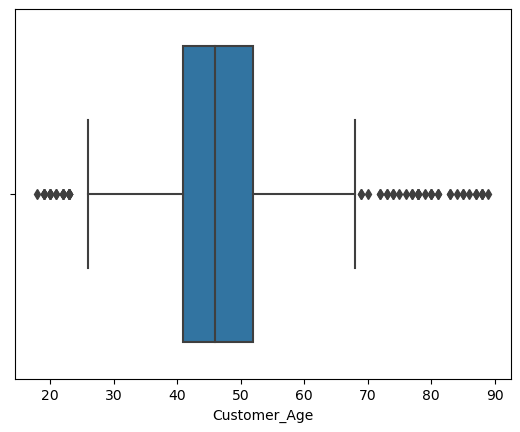

In [14]:
def box_plot(s):
    for col in s:
        print("Box plot for the column:", col)
        sns.boxplot(x=col, data=Data)  # Use x=col to specify the column to be plotted
        plt.show()

box_plot(['Customer_Age'])  # You can pass a list of column names as the argument


Box plot for the column: Dependent_count


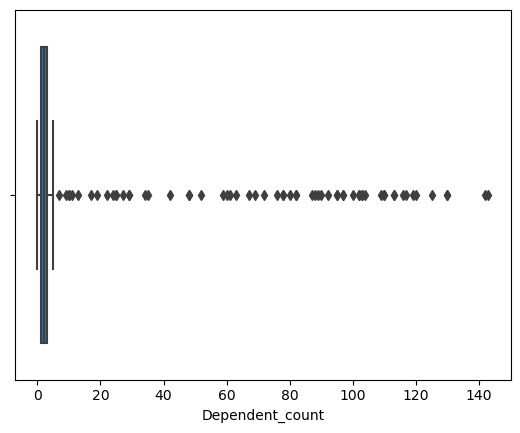

Box plot for the column: Months_on_book


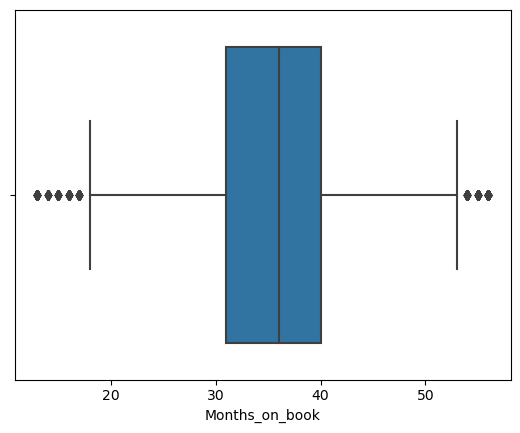

Box plot for the column: Total_Relationship_Count


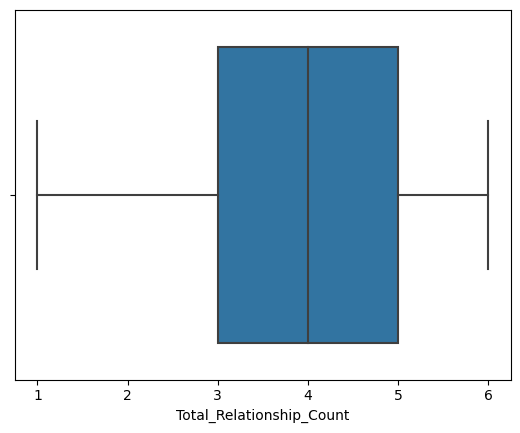

Box plot for the column: Months_Inactive_12_mon


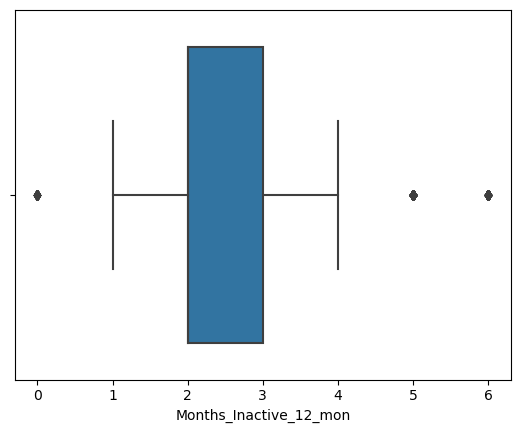

Box plot for the column: Contacts_Count_12_mon


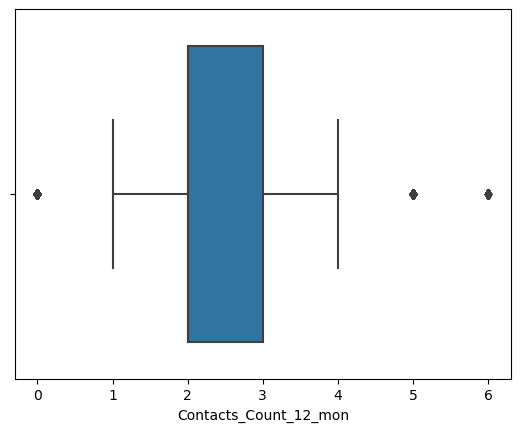

Box plot for the column: Credit_Limit


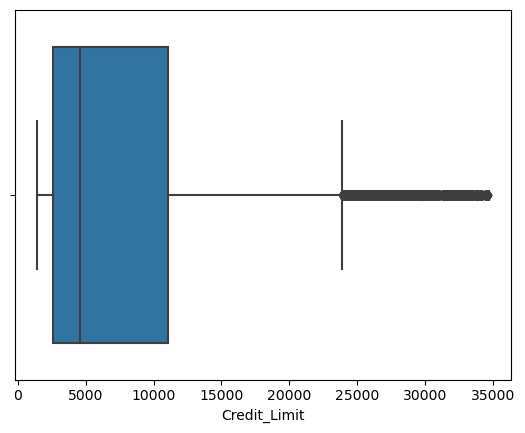

Box plot for the column: Total_Revolving_Bal


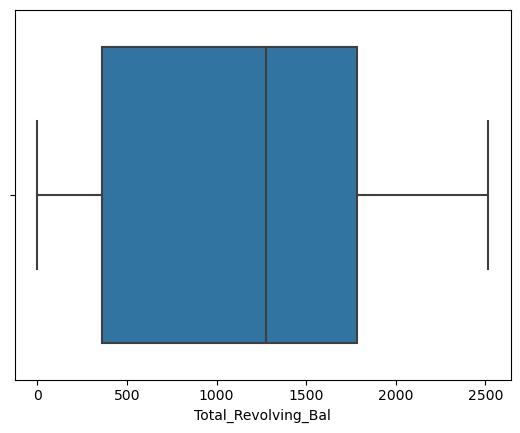

Box plot for the column: Avg_Open_To_Buy


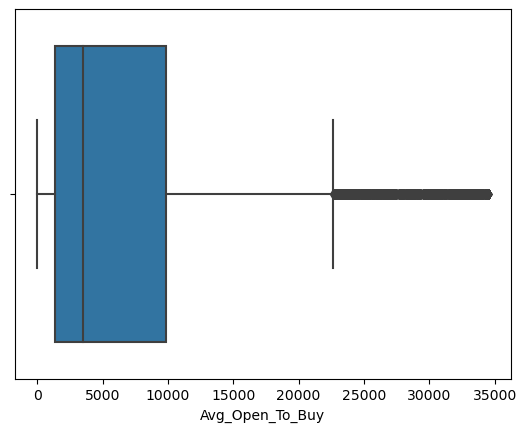

Box plot for the column: Total_Trans_Amt


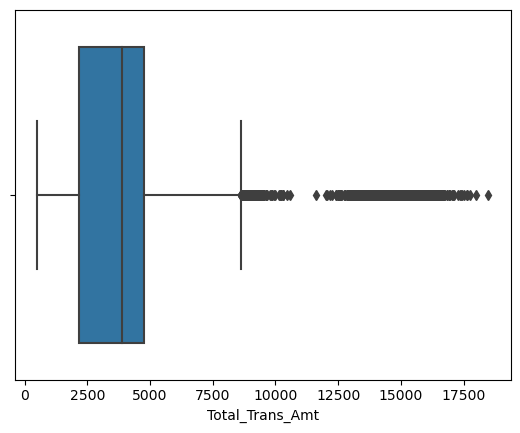

Box plot for the column: Total_Trans_Ct


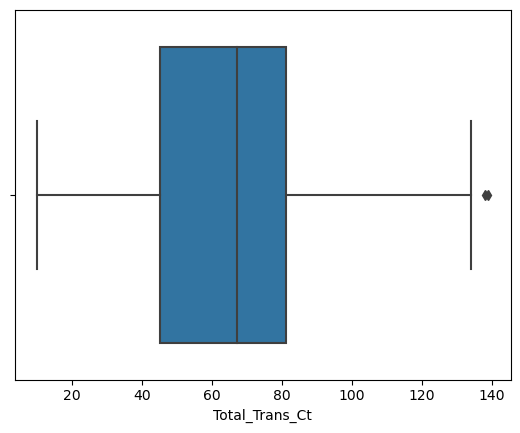

Box plot for the column: Avg_Utilization_Ratio


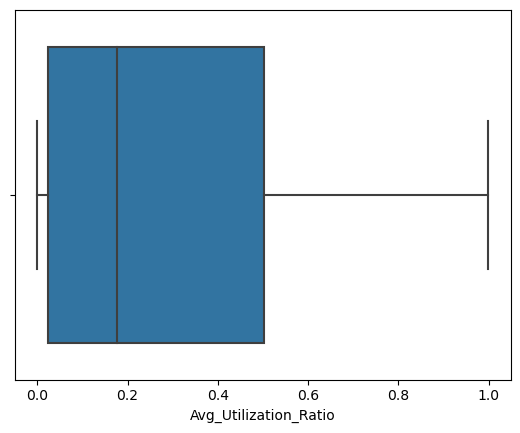

In [15]:
box_plot(['Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Avg_Utilization_Ratio'])

# Outliers Treatment

##  Instead of mean,median treatment in this data, a common approach is to use capping (at a specific quantile) to reduce the impact of extreme values on your analysis. 

In [16]:
Data.loc[Data["Dependent_count"]>7,"Dependent_count"]=Data["Dependent_count"].mode()[0]

### **This finds rows in the "Dependent_count" column where the value is greater than 7 and replaces those values with the mode (most frequent) value of the "Dependent_count" column. It's essentially replacing outlier values (values greater than 7) with a more common value from the same colum

Box plot for the column: Dependent_count


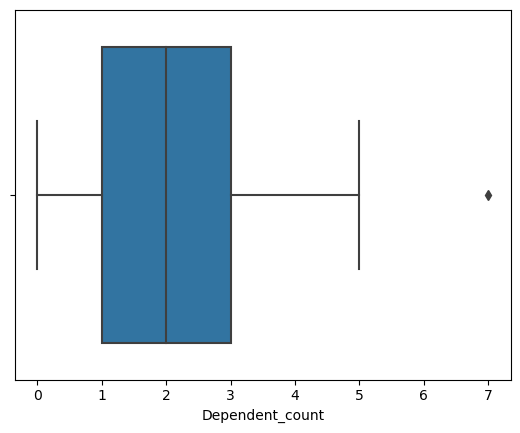

In [19]:
box_plot(["Dependent_count"])

In [20]:
Data.loc[Data["Credit_Limit"]>Data["Credit_Limit"].quantile(.95),"Credit_Limit"]=Data["Credit_Limit"].quantile(.95)

### ** This ensures that no values in the "Credit_Limit" column are greater than the 95th percentile value. It's a way to handle outliers in the data by limiting extreme values to a specific threshold, which is the 95th percentile in this case.

Box plot for the column: Credit_Limit


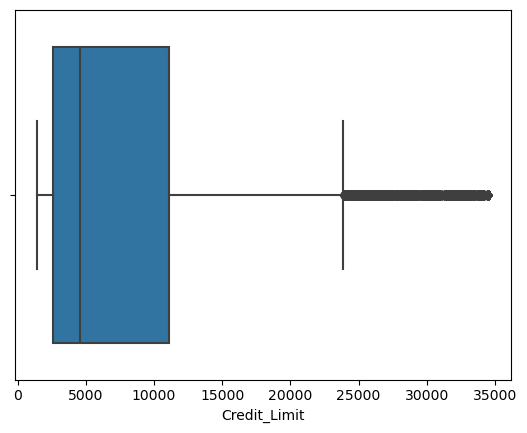

In [21]:
box_plot(["Credit_Limit"])

In [23]:
Data["Total_Trans_Amt"].quantile(.9262)

10548.637999999944

In [24]:
Data.loc[Data["Total_Trans_Amt"]>Data["Total_Trans_Amt"].quantile(.9262),"Total_Trans_Amt"]=Data["Total_Trans_Amt"].quantile(.9262)

### **This ensures that no values in the "Total_Trans_Amt" column are greater than the specified quantile value. This is a way to handle outliers in the data by setting a specific threshold based on a quantile. The exact quantile level of 0.9262 is chosen in this case to cap the data.

Box plot for the column: Total_Trans_Amt


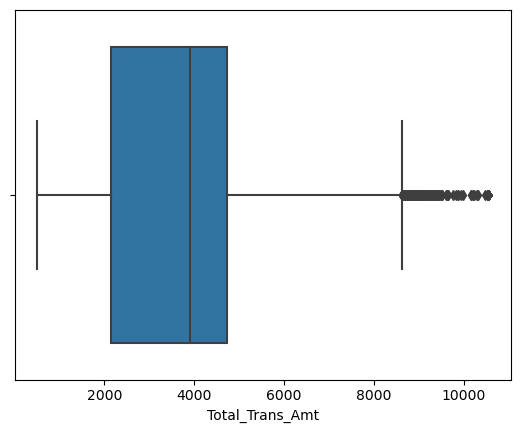

In [25]:
box_plot(["Total_Trans_Amt"])

In [26]:
Data.loc[Data["Avg_Open_To_Buy"]>Data["Avg_Open_To_Buy"].quantile(.95),"Credit_Limit"]=Data["Avg_Open_To_Buy"].quantile(.95)

### **This code ensures that no values in the "Avg_Open_To_Buy" column are greater than the specified quantile value (approximately the 95th percentile). This is a way to handle outliers in the data by setting a specific threshold based on a quantile. 

Box plot for the column: Avg_Open_To_Buy


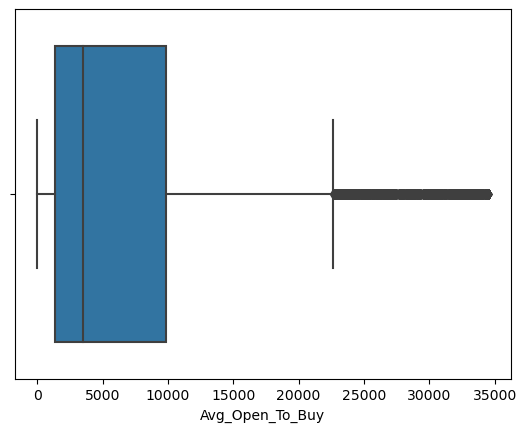

In [27]:
box_plot(["Avg_Open_To_Buy"])

# Exporting the data

In [29]:
Data.to_csv("Capstone_Tableau_Data.csv")